In [1]:
# 必要なライブラリのインポート
import keras
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/nakataniken/anaconda3/envs/keras_python3-7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nakataniken/anaconda3/envs/keras_python3-7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nakataniken/anaconda3/envs/keras_python3-7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

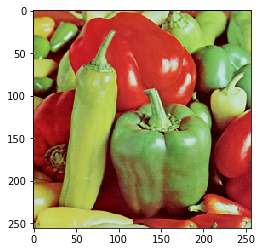

In [2]:
# 画像を読み込む。
img = image.load_img('ダウンロード/研究用画像(bmp)/Pepper.bmp')
img = np.array(img)

plt.imshow(img)
plt.show()

In [3]:
save_path = '変形画像集/Pepper_aug'  # 保存ディレクトリのパス

# 指定したディレクトリが存在しないとエラーになるので、
# 予め作成しておく。
import os
os.makedirs(save_path, exist_ok=True)

#  
datagen = image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.1, 1.0],
    shear_range=30,)

# ミニバッチを生成するジェネレーターを作成する。
x = img[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
                   save_prefix='generated', save_format='bmp')


In [4]:
# ジェネレーターで1000枚生成する。
plt.figure(figsize=(10, 8))
for i in range(1000):
    # ミニバッチを生成したタイミングでディレクトリに
    # 画像が保存される。
    next(gen)

<Figure size 720x576 with 0 Axes>